# 1. Введение

## КАКОЙ КЕЙС РЕШАЕМ?

Представьте, что вы работаете дата-сайентистом в компании Booking. Одна из проблем компании — это нечестные отели, которые накручивают себе рейтинг. Одним из способов обнаружения таких отелей является построение модели, которая предсказывает рейтинг отеля. Если предсказания модели сильно отличаются от фактического результата, то, возможно, отель ведёт себя нечестно, и его стоит проверить.

# 2. Разбираемся с данными

Первоначальная версия датасета содержит 17 полей со следующей информацией:

        hotel_address — адрес отеля;
        review_date — дата, когда рецензент разместил соответствующий отзыв;
        average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
        hotel_name — название отеля;
        reviewer_nationality — страна рецензента;
        negative_review — отрицательный отзыв, который рецензент дал отелю;
        review_total_negative_word_counts — общее количество слов в отрицательном отзыв;
        positive_review — положительный отзыв, который рецензент дал отелю;
        review_total_positive_word_counts — общее количество слов в положительном отзыве.
        reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;
        total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;
        total_number_of_reviews — общее количество действительных отзывов об отеле;
        tags — теги, которые рецензент дал отелю;
        days_since_review — количество дней между датой проверки и датой очистки;
        additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
        lat — географическая широта отеля;
        lng — географическая долгота отеля.

In [3]:
import pandas as pd

hotels = pd.read_csv('data/hotels.csv')
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


✍ Ответы на вопросы ниже помогут вам лучше сориентироваться в файле, а также покажут некоторые важные особенности, которые необходимо будет учесть при создании модели.

В каких столбцах данные содержат пропущенные значения?

In [6]:
hotels.isna().sum()[hotels.isna().sum().values>0]

lat    2448
lng    2448
dtype: int64

Задание 2.2
2/2 points (graded)
В каких столбцах данные хранятся в числовом формате?

In [19]:
hotels.dtypes.sort_values()

total_number_of_reviews                         int64
additional_number_of_scoring                    int64
total_number_of_reviews_reviewer_has_given      int64
review_total_positive_word_counts               int64
review_total_negative_word_counts               int64
reviewer_score                                float64
lat                                           float64
lng                                           float64
average_score                                 float64
reviewer_nationality                           object
positive_review                                object
hotel_name                                     object
review_date                                    object
tags                                           object
days_since_review                              object
negative_review                                object
hotel_address                                  object
dtype: object

# 3. Машинное обучение для самых маленьких

## 1 РАЗДЕЛЕНИЕ НАБОРА ДАННЫХ

Прежде всего, для создания модели необходимо разделить датафрейм на набор данных, которые мы будем использовать для обучения модели, именуемый X, и на целевую переменную — величину, значение которой мы будем предсказывать, y (в нашем случае это рейтинг отелей).

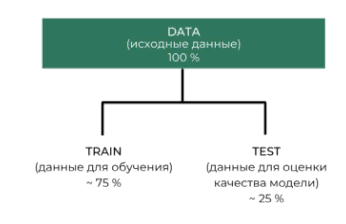

Далее каждый из полученных наборов мы делим на тренировочный (train, используется для обучения модели) и тестовый (test, используется для оценки точности модели). Такое деление осуществляется с помощью специального метода train_test_split() библиотеки sklearn. В параметрах метода (параметр test_size) мы указываем, какую часть исходного датафрейма нужно оставить для тестирования модели. В нашем коде эта часть составляет 25 %, или 0.25.

Не существует идеального соотношения обучающей и тестовой выборки, однако принято выделять на часть обучения больше данных, около ⅔, а оставшуюся часть используют для проверки — ⅓ выборки. Таким образом, самые популярные значения параметра test_size составляют 0.3, 0.25, 0.2.

In [ ]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
X = df.drop(['reviewer_score'], axis = 1)  
y = df['reviewer_score']  
   
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
   
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
# Для тестирования мы будем использовать 25 % от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

## 2 СОЗДАНИЕ И ОБУЧЕНИЕ МОДЕЛИ

Сам процесс создания и тестирования модели занимает всего четыре строчки кода. В качестве алгоритма мы будем использовать популярный и довольно мощный алгоритм RandomForestRegressor. Он реализован в библиотеке sklearn.

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [20]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
     
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
  
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
  
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)

NameError: name 'X_train' is not defined


## 3 ОЦЕНКА КАЧЕСТВА МОДЕЛИ

Для оценки качества модели — точности прогнозов, сделанных моделью, — мы будем использовать метрику (некий числовой показатель), которая называется MAPE (mean absolute percentage error), средняя абсолютная процентная ошибка. Эту метрику очень легко интерпретировать. Если у вас MAPE = 11.4 %, то это говорит о том, что ошибка составила 11.4 % от фактических значений.

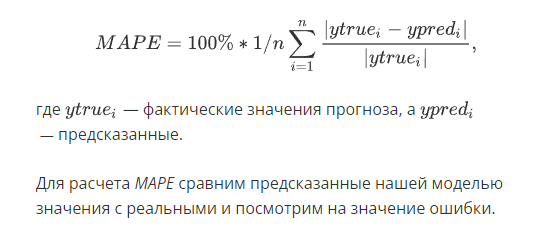

In [21]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test) и 
# смотрим, насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает 
# среднюю абсолютную процентную ошибку предсказанных значений 
# в отношении фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))

NameError: name 'y_test' is not defined